In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

import os
import random
import numpy as np
import matplotlib.pyplot as plt
os.environ['TFF_CPP_MIN_LOG_LEVEL'] = '2'

%matplotlib inline

**Loading the dataset**

In [2]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

11501568/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [ ]:
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

**Checking the dataset**

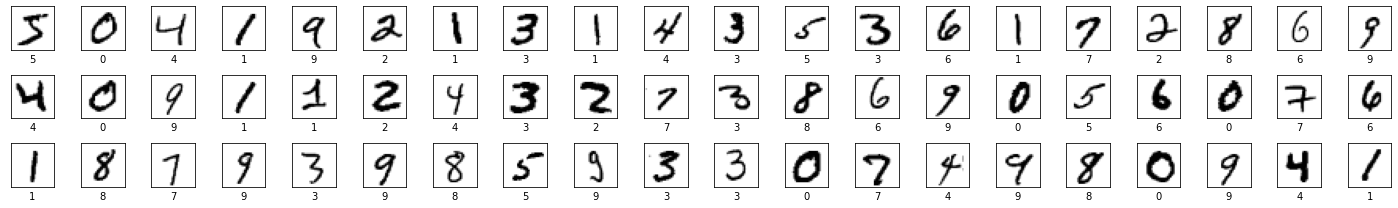

In [3]:
plt.figure(figsize=(20,3))
for i in range(60):
    plt.subplot(3, 20, i+1)
    #plt.imshow(X_train[i])
    plt.imshow(X_train[i], cmap=plt.cm.gray_r)
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(Y_train[i])
    plt.tight_layout()
plt.show()

In [3]:
X_train, X_test = X_train / 255.0, X_test / 255.0
X_train, X_test = np.expand_dims(X_train, axis=-1), np.expand_dims(X_test, axis=-1)

**Three layer with filters**

In [4]:
model = keras.Sequential([
    ## input layer
    keras.Input(shape=(28,28,1)),
    
    ## hidden layers
    layers.Conv2D(filters=32, kernel_size=(3,3), padding="valid", activation='relu'), # input->(32,32) output->(28,28)
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Dropout(0.5),
    layers.Conv2D(filters=64, kernel_size=(3,3), padding="valid", activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Dropout(0.5),
    layers.Conv2D(filters=128, kernel_size=(3,3), padding="valid", activation='relu'),
    #layers.MaxPooling2D(pool_size=(2,2)),
    
    layers.Flatten(),
    #layers.Dense(100, activation='relu'),
    
    ## output layer
    layers.Dense(10, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 128)         7

**Testing Different Optimizers**

In [11]:
model.compile(
    optimizer='adam', 
    #optimizer='SGD', 
    #optimizer='RMSprop',
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

**Trainning Dataset and accuracy**

In [12]:
h = model.fit(x=X_train, y=Y_train, epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 51s 34ms/step - loss: 0.0527 - accuracy: 0.9843 - val_loss: 0.0339 - val_accuracy: 0.9897
Epoch 2/10
1500/1500 [==============================] - 50s 34ms/step - loss: 0.0463 - accuracy: 0.9858 - val_loss: 0.0337 - val_accuracy: 0.9903
Epoch 3/10
1500/1500 [==============================] - 50s 33ms/step - loss: 0.0446 - accuracy: 0.9862 - val_loss: 0.0308 - val_accuracy: 0.9923
Epoch 4/10
1500/1500 [==============================] - 50s 34ms/step - loss: 0.0429 - accuracy: 0.9869 - val_loss: 0.0337 - val_accuracy: 0.9903
Epoch 5/10
1500/1500 [==============================] - 50s 34ms/step - loss: 0.0427 - accuracy: 0.9869 - val_loss: 0.0344 - val_accuracy: 0.9902
Epoch 6/10
1500/1500 [==============================] - 50s 34ms/step - loss: 0.0393 - accuracy: 0.9877 - val_loss: 0.0296 - val_accuracy: 0.9923
Epoch 7/10
1500/1500 [==============================] - 50s 33ms/step - loss: 0.0388 - accuracy: 0.9879 - val_loss: 0.0299 -

**Plotting the Graph**

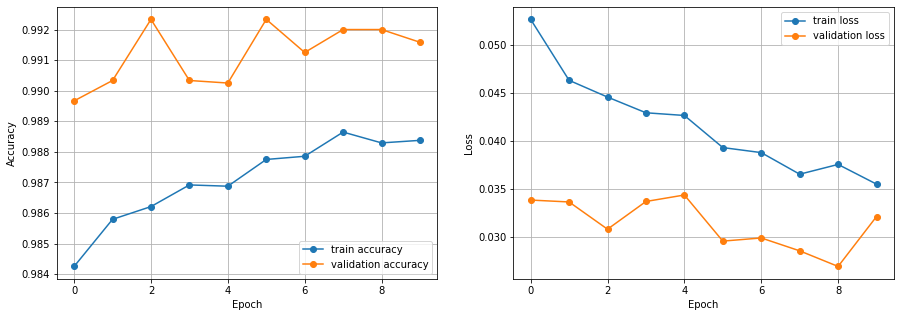

In [13]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label='train loss')
plt.plot(h.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [10]:

test_loss, test_acc = model.evaluate(X_test, Y_test)
print('\nTest Accuracy:', test_acc)
print('\nTest Loss:', test_loss)

313/313 [==============================] - 3s 10ms/step - loss: 0.0365 - accuracy: 0.9894

Test Accuracy: 0.9894000291824341

Test Loss: 0.0364818200469017
